# Table of content

## EDA
1. [Problem statement and data collection](##1-problem-statement-and-data-collection)  
2. [Exploration and data cleaning](##2-Exploration-and-data-cleaning)
   - [2.1: Understanding the features](###21-Understanding-the-features)  
   - [2.2: Identifying null values](###22-Identifying-null-values)  
   - [2.3: Eliminating irrelevant information and dealing with duplicate values ](###23-Eliminating-irrelevant-information-and-dealing-with-duplicate-values)  
3. [Univariate Analysis](##3-Univariate-Analysis)  
   - [3.1: Categorical Variable Analysis](###31-Categorical-Variable-Analysis)  
   - [3.2: Numerical Variable Analysis](###32-Numerical-Variable-Analysis)  
4. [Multivariate Analysis](##4-Multivariate-Analysis)  
   - [4.1 Numerical - Numerical Variable Analysis](###41-Numerical---Numerical-Variable-Analysis)
   - [4.2 Categorical - Categorical Variable Analysis](###42-Categorical---Categorical-Variable-Analysis) 
   - [4.3 Exploring combinations of the target variable with multiple predictors](###43-Exploring-combinations-of-the-target-variable-with-multiple-predictors) 
   - [4.4 Correlation Analysis](###45-Correlation-Analysis) 
5. [Feature Engineering](##5-Feature-Engineering)
   - [5.1 Outlier Analysis](###51-Outlier-Analysis)
   - [5.2 Split train test of both Data Frames](###52-Split-train-test-of-both-Data-Frames)
   - [5.3 Feature Scaling](###53-Feature-Scaling)
   - [5.4 Saving Data Frames into excel files](###54-Saving-Data-Frames-into-excel-files) 
   - [5.5 Feature selection](###55-Feature-selection)

## Machine Learning
6. [Linear Regression](###6-Linear-Regression)
7. [Lasso model](###7-Lasso-model)
8. [Ridge model](###8-Ridge-model)
9. [Elastic Net](###9-Elastic-Net)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## EDA

## 1. Problem statement and data collection

In [114]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import MinMaxScaler
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)

In [115]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Exploration and data cleaning

### 2.1 Understanding the features

- **Pregnancies**: Number of pregnancies of the patient (numeric)

- **Glucose**: Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)

- **BloodPressure**: Diastolic blood pressure (measured in mm Hg) (numeric)

- **SkinThickness**: Triceps skin fold thickness (measured in mm) (numeric)

- **Insulin**: 2-hour serum insulin (measured in mu U/ml) (numeric)

- **BMI**: Body mass index (numeric)

- **DiabetesPedigreeFunction**: Diabetes Pedigree Function (numeric)

- **Age**: Age of patient (numeric)

- **Outcome**: Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

The goal is to predict, based on diagnostic measures, whether or not a patient has diabetes.

In [116]:
total_data.shape

(768, 9)

Our dataframe contains 768 rows and it has 9 columns or variables.

### 2.2 Identifying null values

In [117]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We do not have any nulls  in the dataframe and all are numerical variables.

### 2.3 Eliminating irrelevant information and dealing with duplicate values

In [118]:
total_data.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


The dataframe contains no nulls

We have decided to do not eliminate any variable.

## 3. Univariate Analysis

### 3.1 Categorical Variable Analysis

There are no categorical variables, so we skip this step.

### 3.2 Numerical Variable Analysis

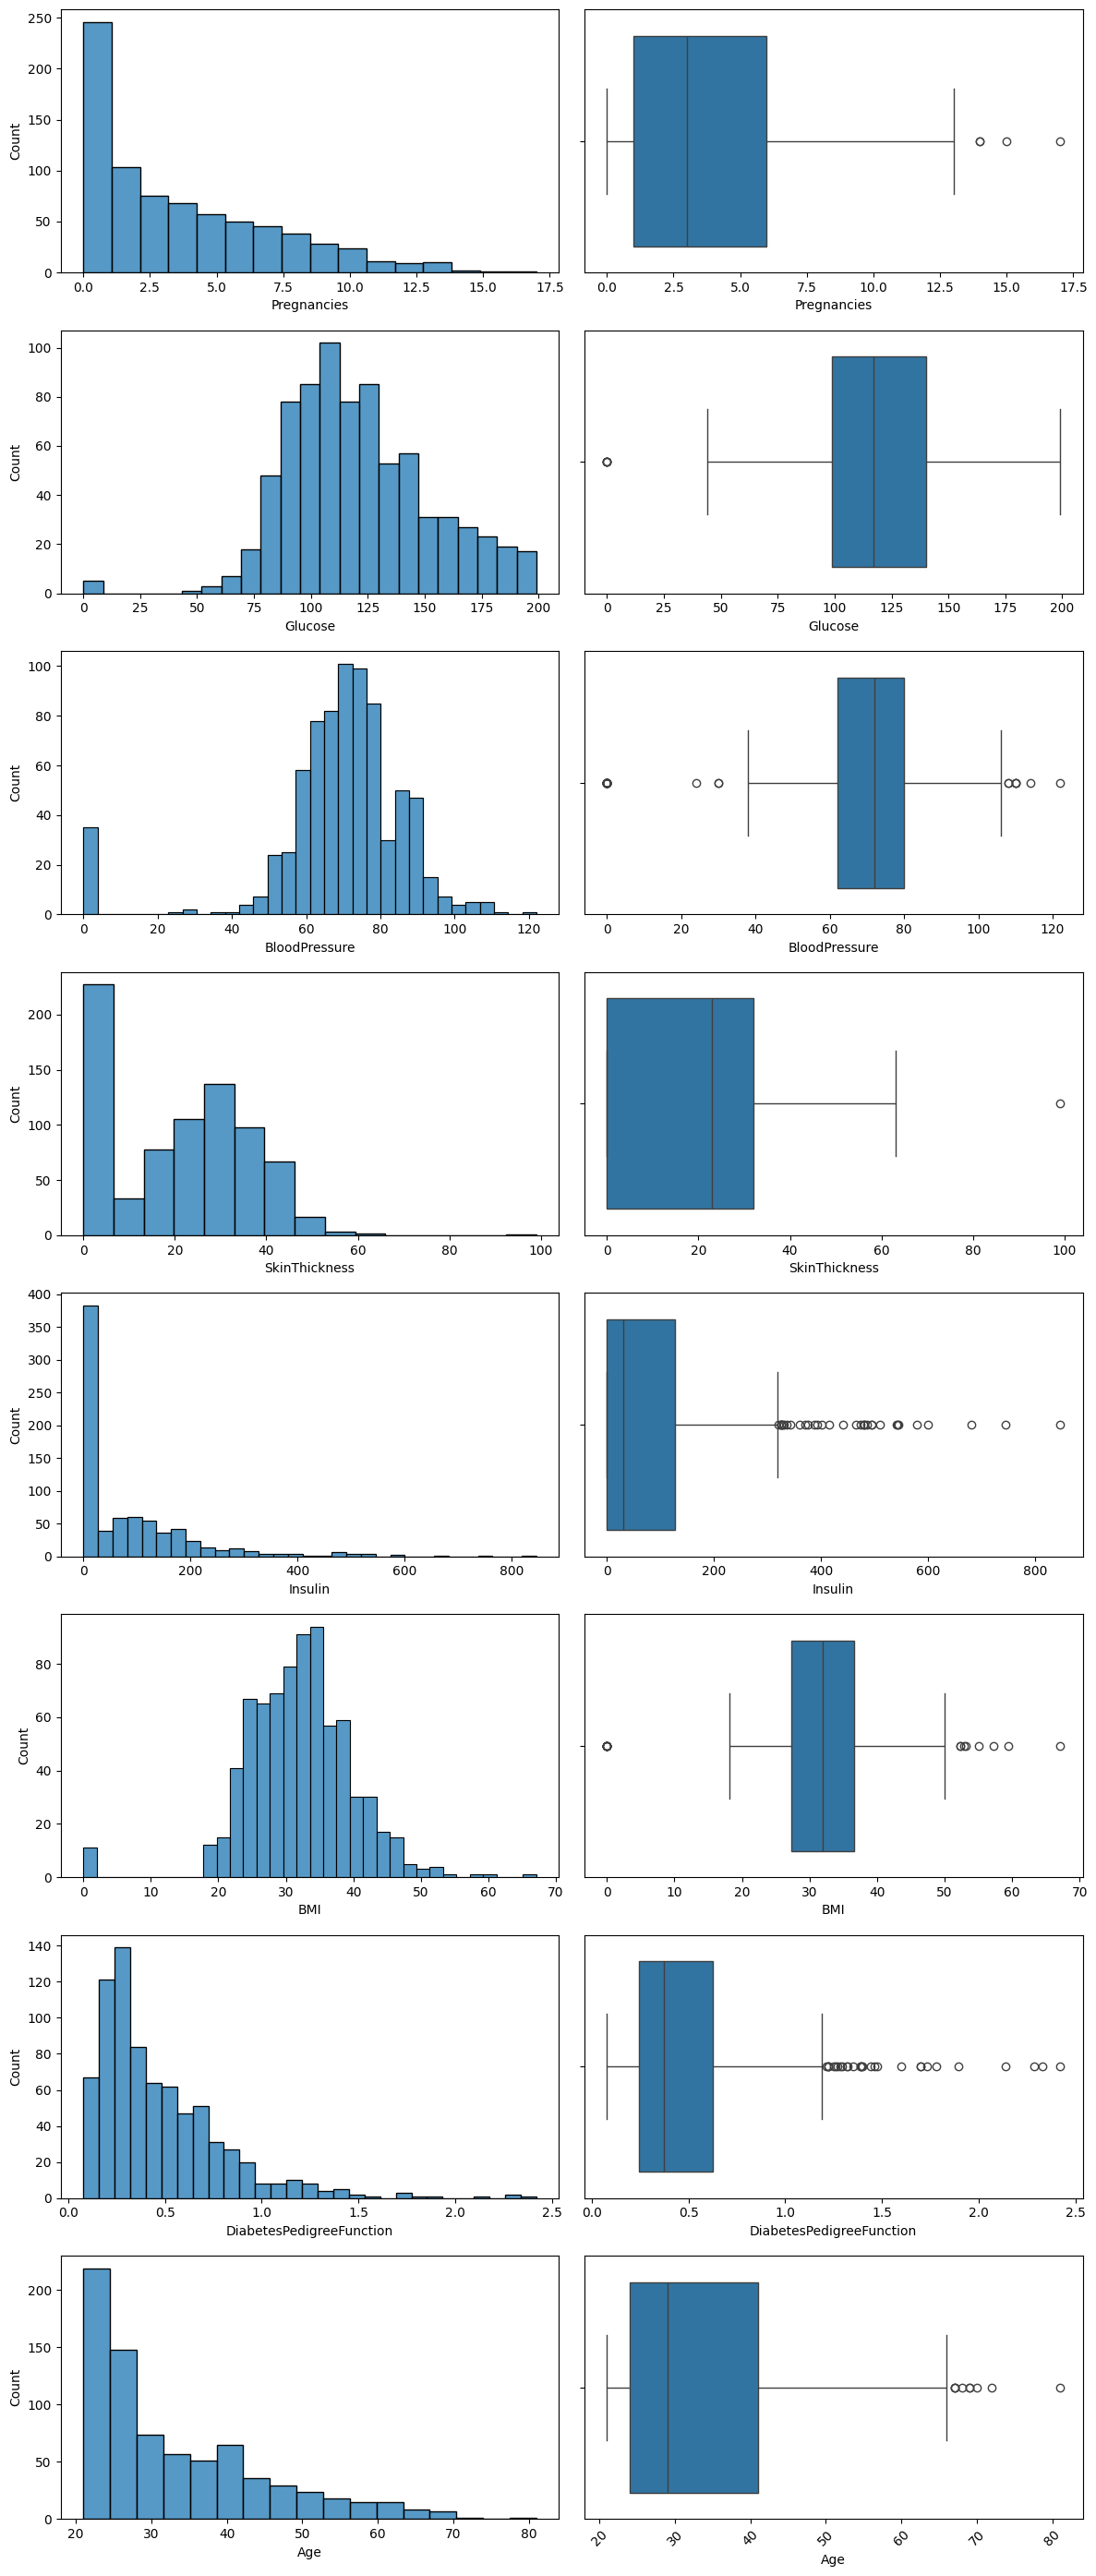

In [119]:
fig, axis = plt.subplots(8, 2, figsize=(12, 28))

sns.histplot(ax=axis[0, 0], data=total_data, x="Pregnancies")
sns.boxplot(ax=axis[0, 1], data=total_data, x="Pregnancies")

sns.histplot(ax=axis[1, 0], data=total_data, x="Glucose")
sns.boxplot(ax=axis[1, 1], data=total_data, x="Glucose")

sns.histplot(ax=axis[2, 0], data=total_data, x="BloodPressure")
sns.boxplot(ax=axis[2, 1], data=total_data, x="BloodPressure")

sns.histplot(ax=axis[3, 0], data=total_data, x="SkinThickness")
sns.boxplot(ax=axis[3, 1], data=total_data, x="SkinThickness")

sns.histplot(ax=axis[4, 0], data=total_data, x="Insulin")
sns.boxplot(ax=axis[4, 1], data=total_data, x="Insulin")

sns.histplot(ax=axis[5, 0], data=total_data, x="BMI")
sns.boxplot(ax=axis[5, 1], data=total_data, x="BMI")

sns.histplot(ax=axis[6, 0], data=total_data, x="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[6, 1], data=total_data, x="DiabetesPedigreeFunction")

sns.histplot(ax=axis[7, 0], data=total_data, x="Age")
sns.boxplot(ax=axis[7, 1], data=total_data, x="Age")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

## 4. Multivariate Analysis

### 4.1 Numerical - Numerical Variable Analysis

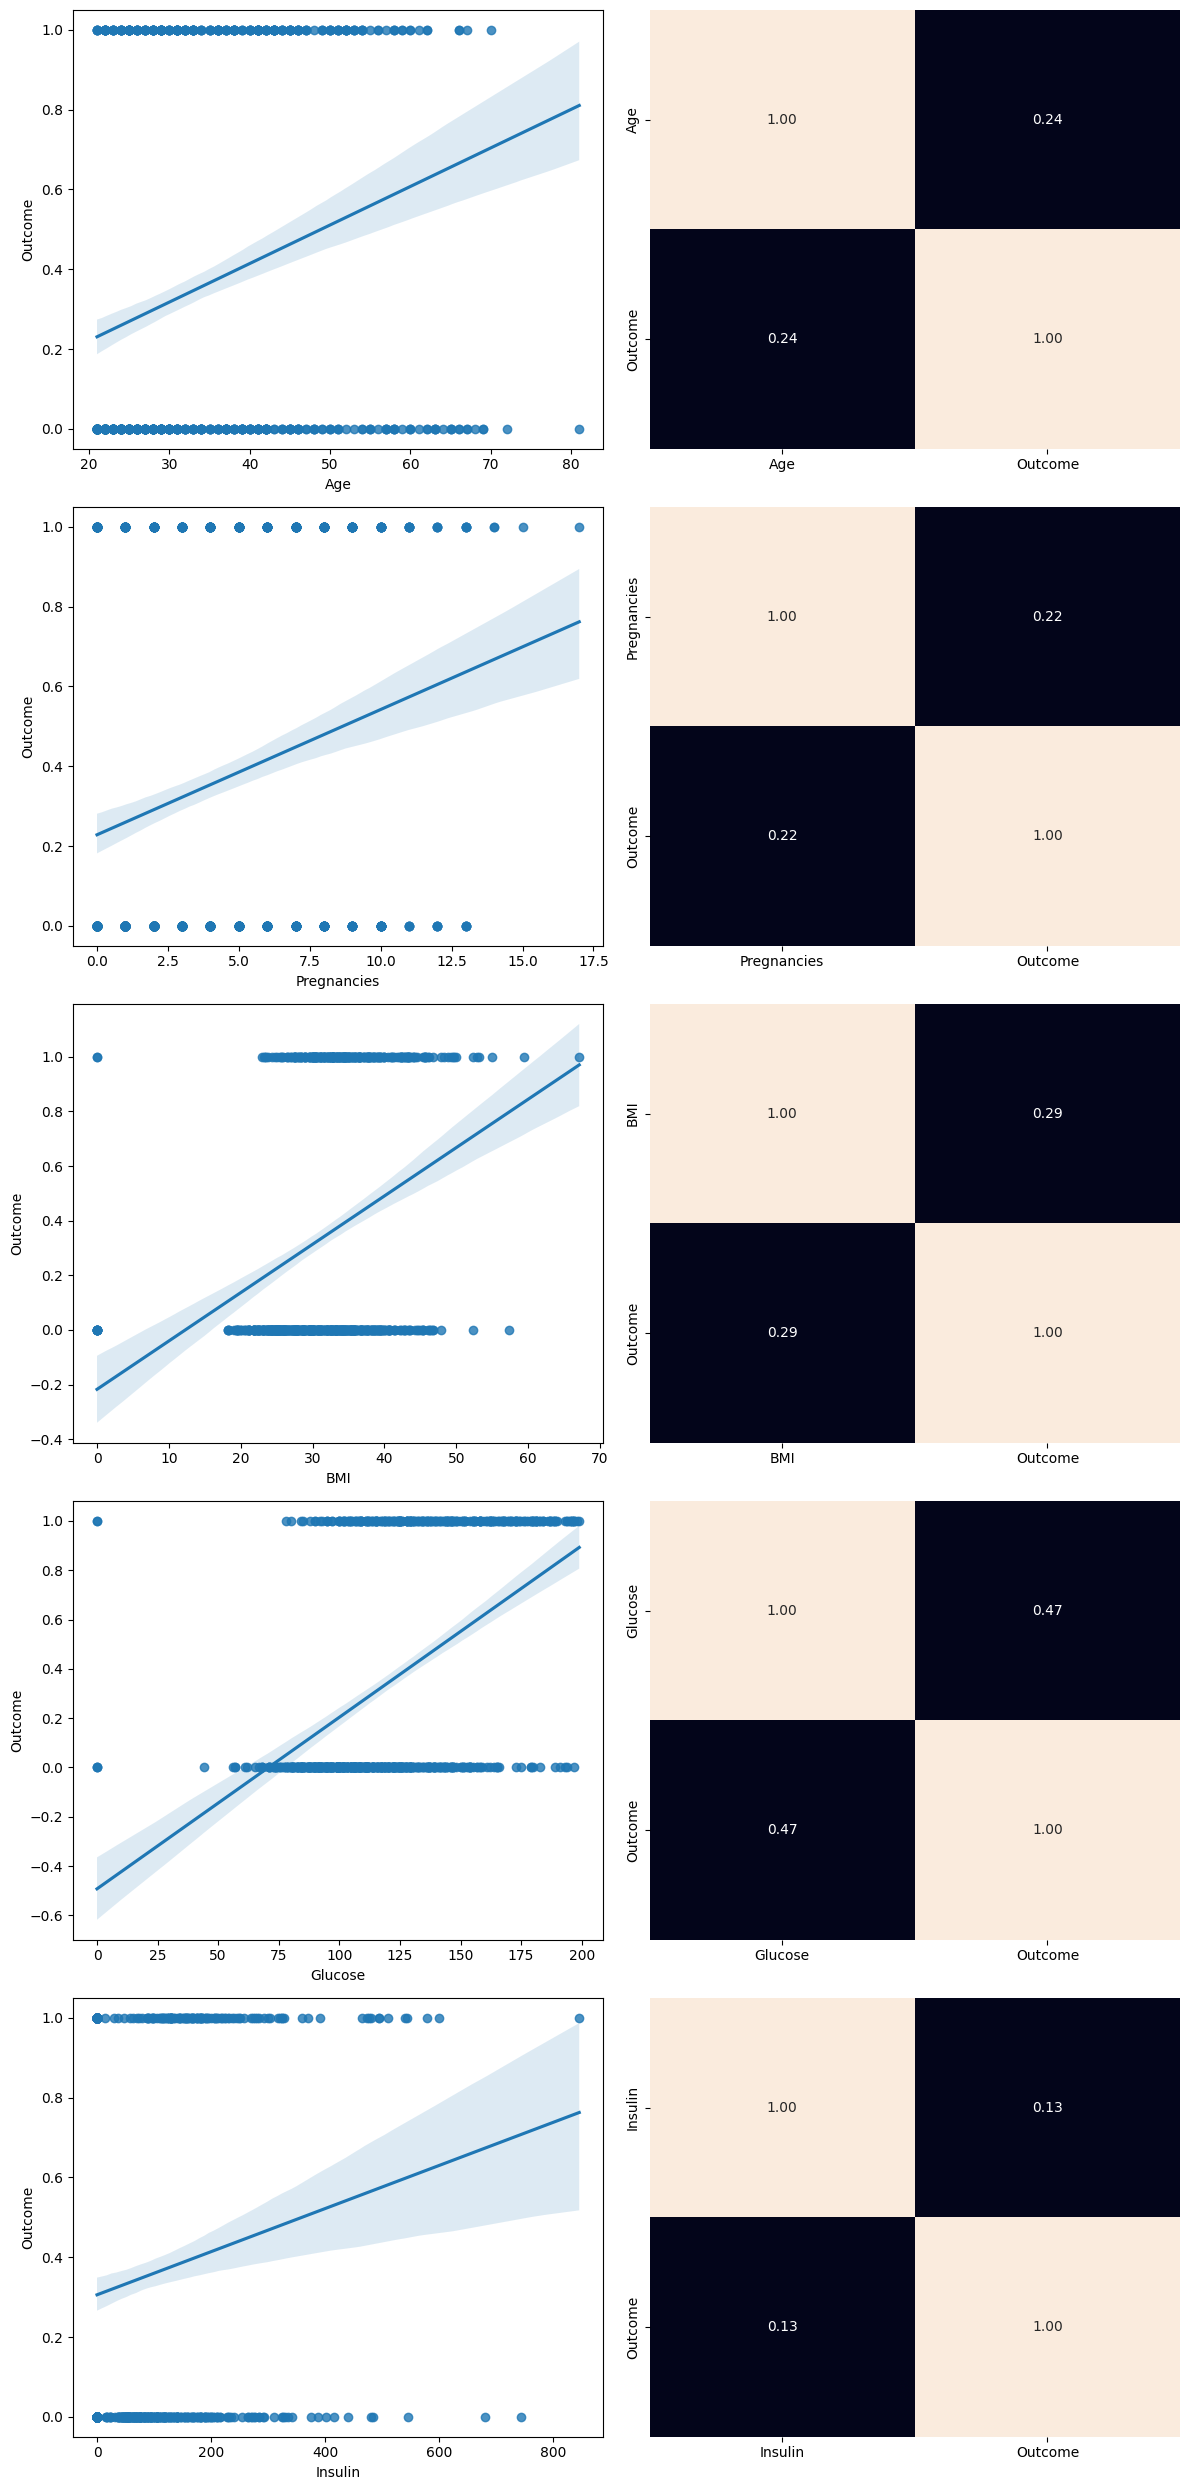

In [120]:
fig, axis = plt.subplots(5, 2, figsize=(12, 25))

sns.regplot(ax=axis[0, 0], data=total_data, x="Age", y="Outcome")
sns.heatmap(total_data[["Age", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[0, 1], cbar=False)

sns.regplot(ax=axis[1, 0], data=total_data, x="Pregnancies", y="Outcome")
sns.heatmap(total_data[["Pregnancies", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(ax=axis[2, 0], data=total_data, x="BMI", y="Outcome")
sns.heatmap(total_data[["BMI", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[2, 1], cbar=False)

sns.regplot(ax=axis[3, 0], data=total_data, x="Glucose", y="Outcome")
sns.heatmap(total_data[["Glucose", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(ax=axis[4, 0], data=total_data, x="Insulin", y="Outcome")
sns.heatmap(total_data[["Insulin", "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis[4, 1], cbar=False)

plt.tight_layout()

plt.show()

### 4.2 Categorical - Categorical Variable Analysis

There are no categorical variables, therefore we need to skip this step.

### 4.3 Exploring combinations of the target variable with multiple predictors

### 4.4 Correlation Analysis

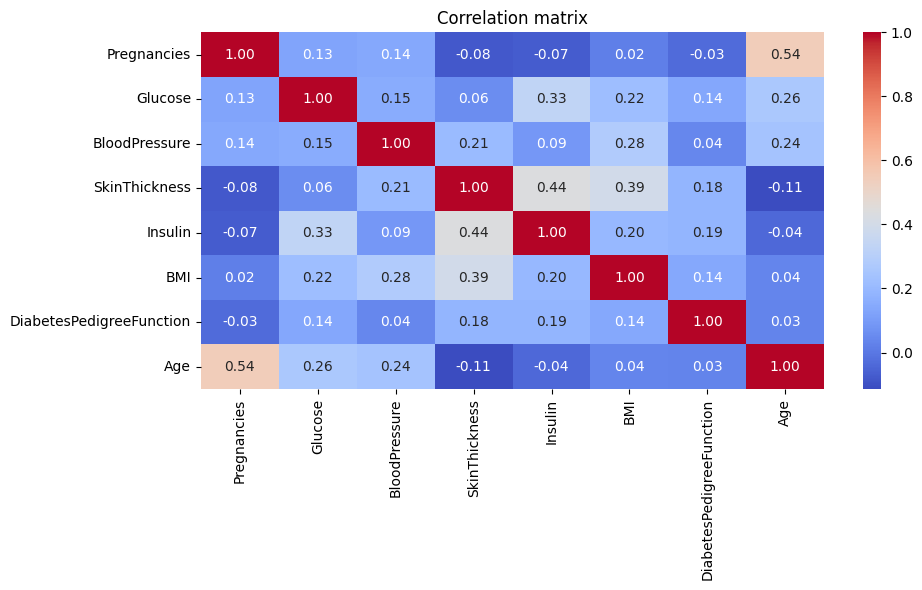

In [121]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")

plt.title("Correlation matrix")

plt.xticks()

plt.tight_layout()

plt.show()

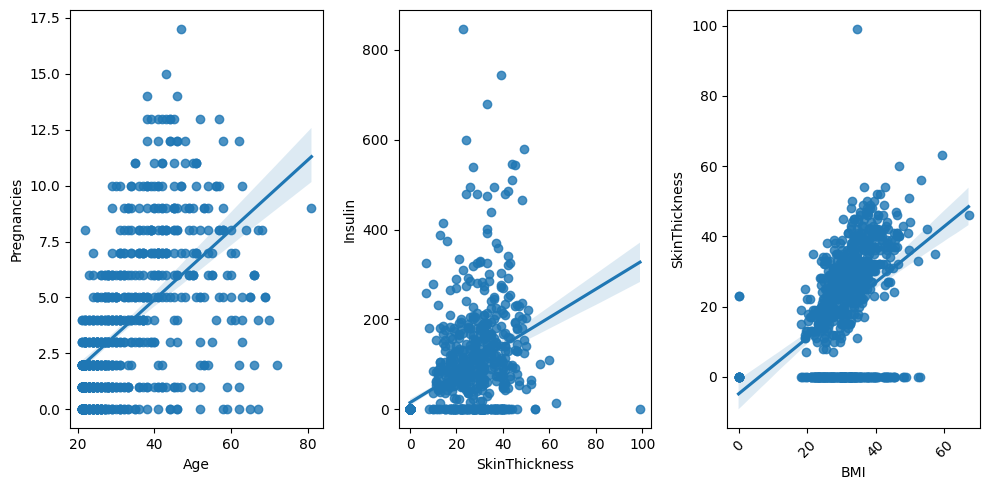

In [122]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)

sns.regplot(ax = axis[0], data = total_data, x = "Age", y = "Pregnancies")
sns.regplot(ax = axis[1], data = total_data, x = "SkinThickness", y = "Insulin")
sns.regplot(ax = axis[2], data = total_data, x = "BMI", y = "SkinThickness")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

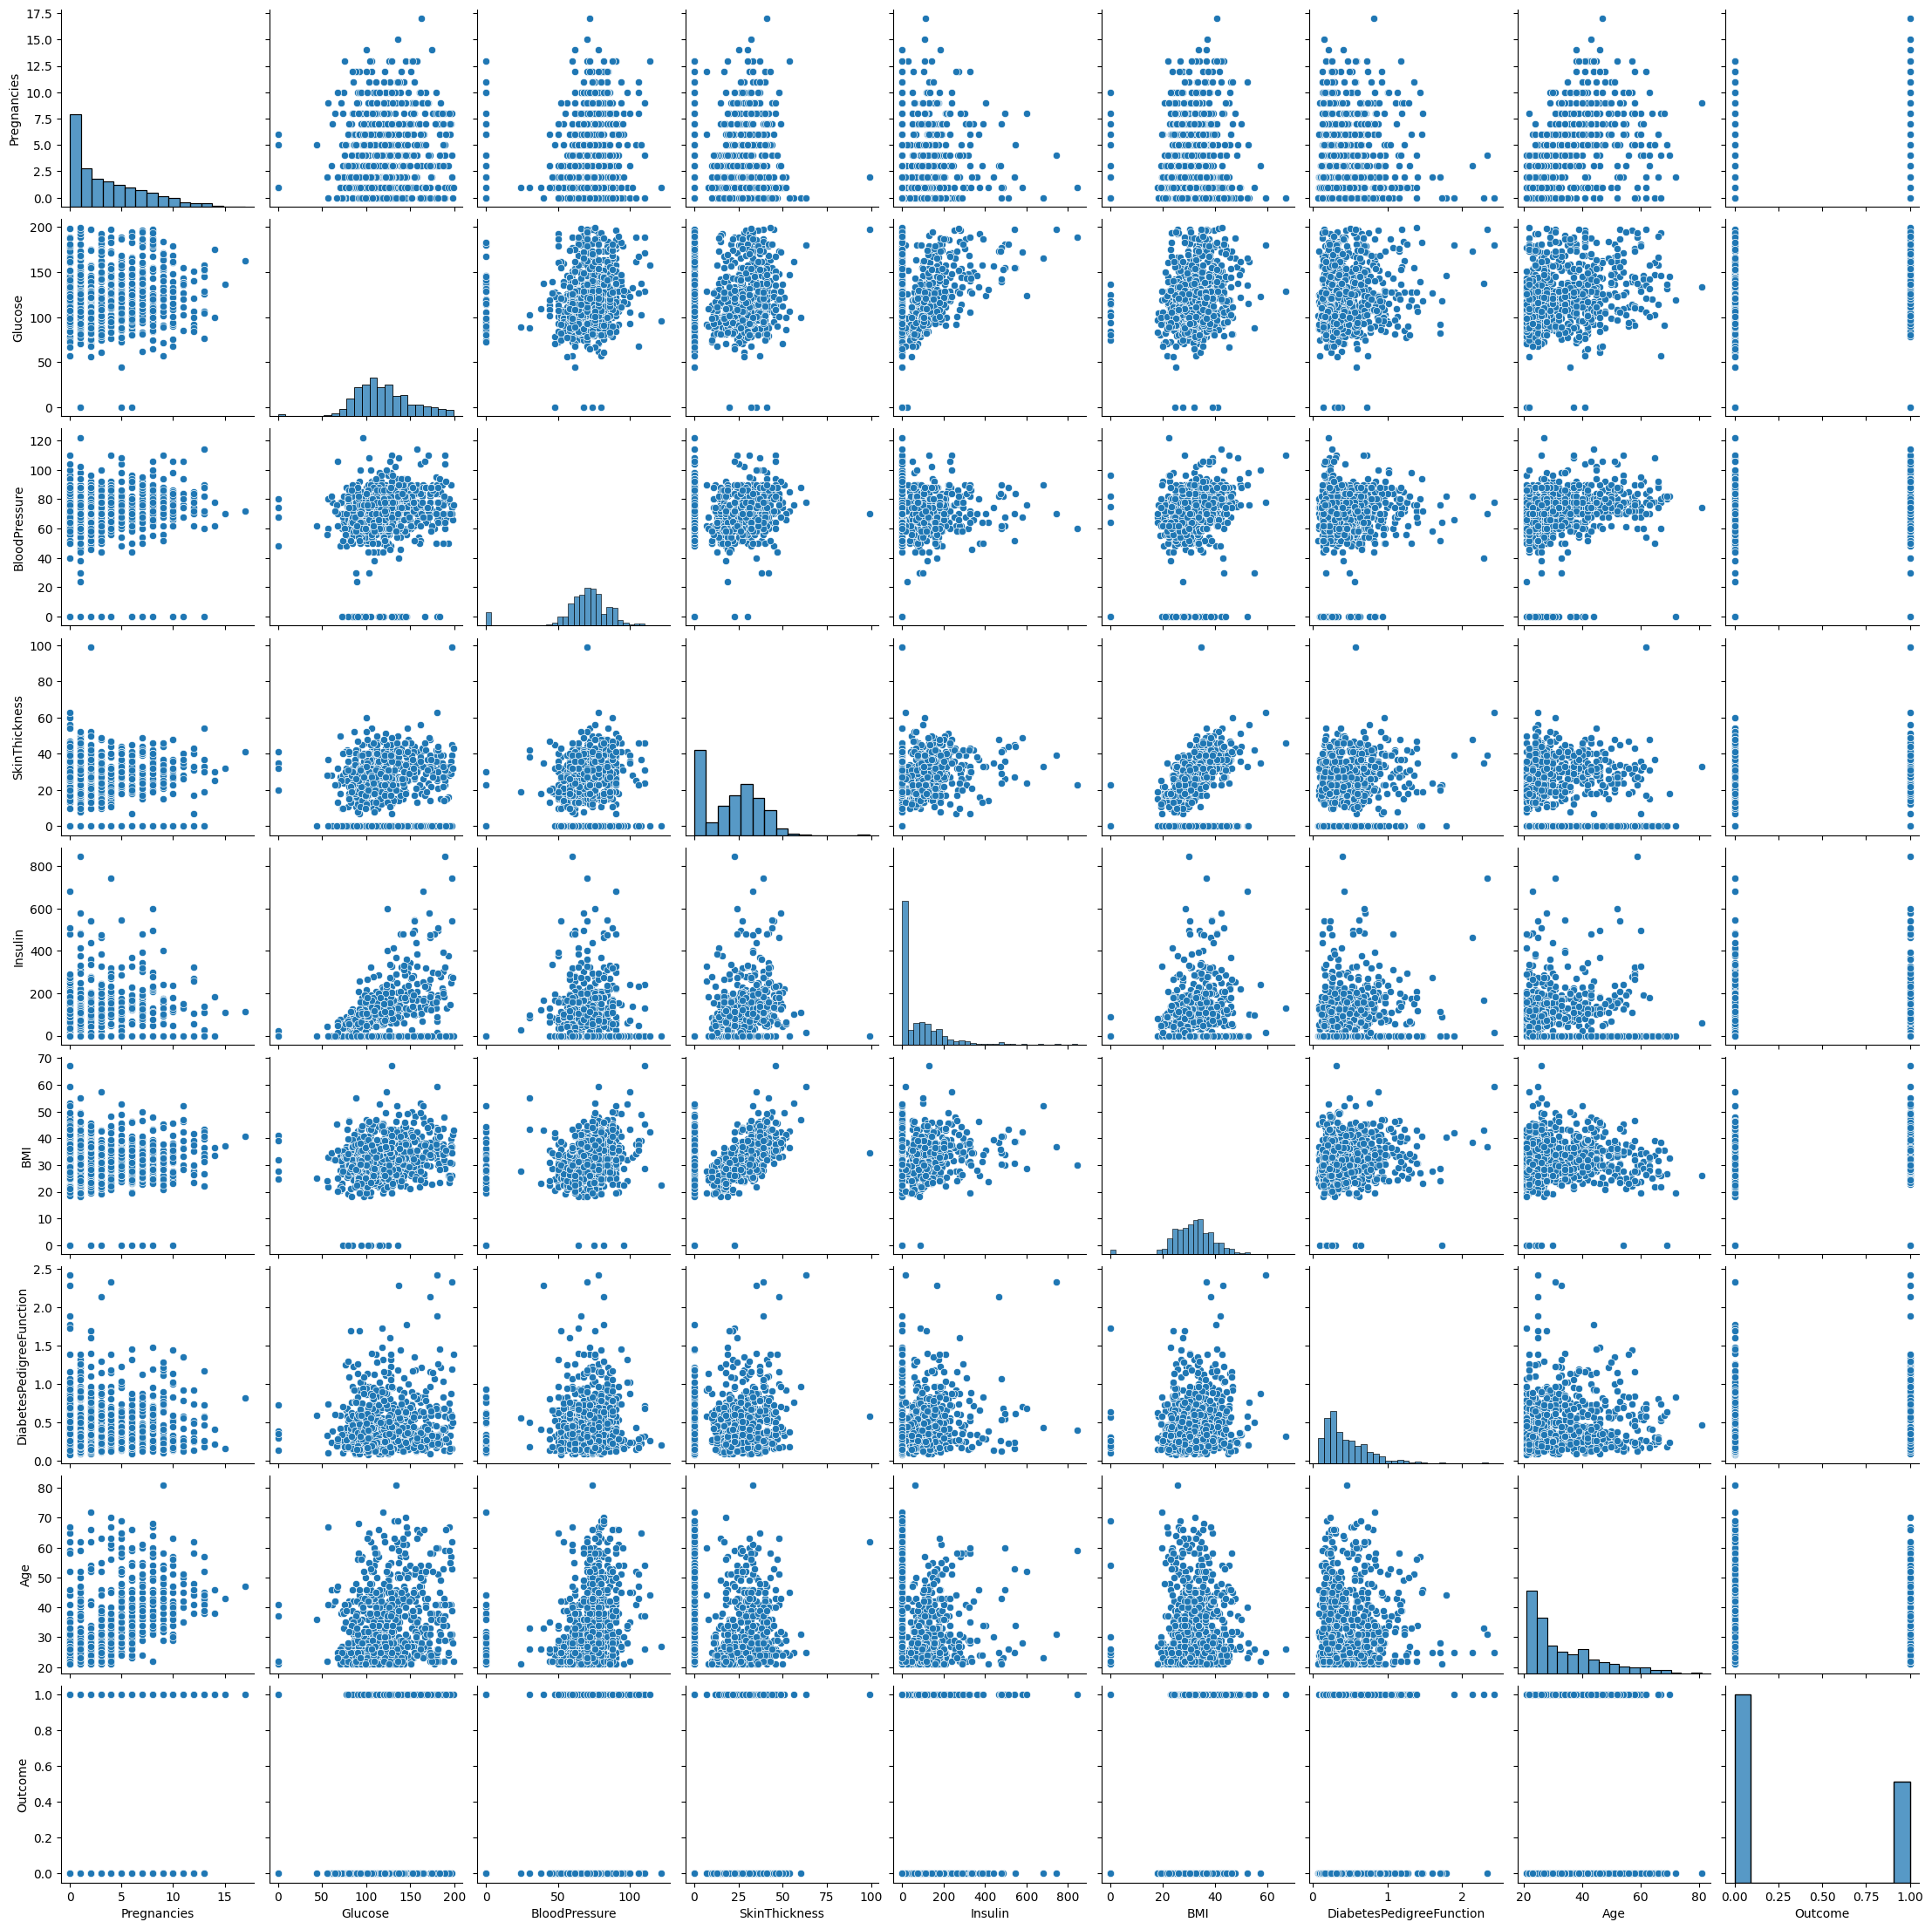

In [123]:
sns.pairplot(data = total_data)

## 5. Feature Engineering

### 5.1 Outlier Analysis

In [124]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


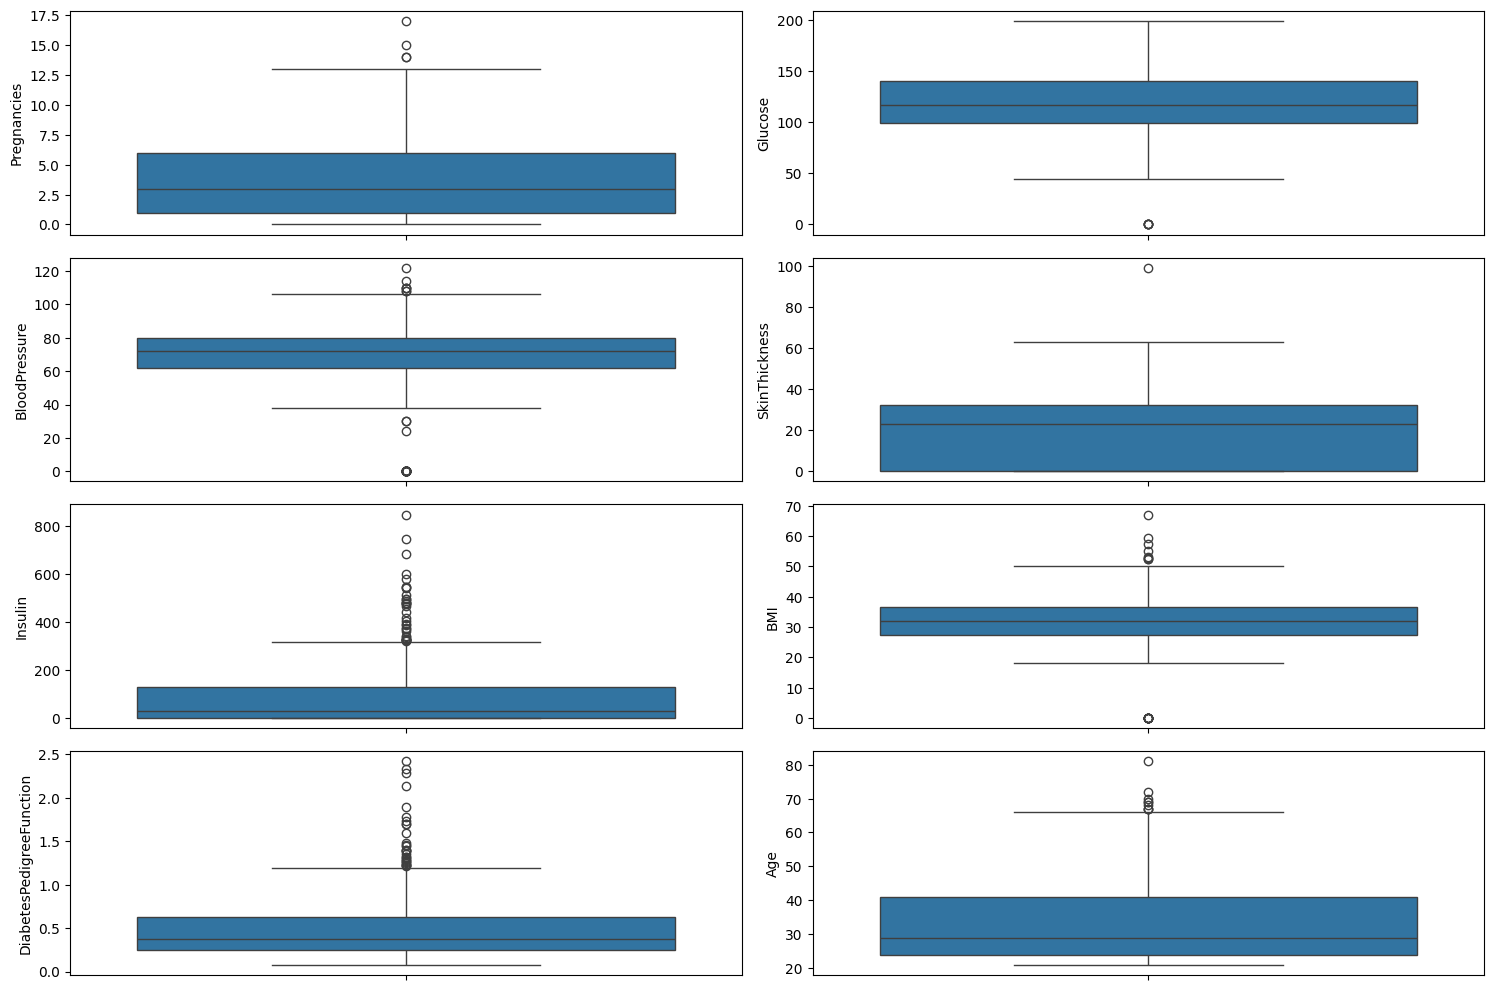

In [125]:
fig, axis = plt.subplots(4, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Pregnancies")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Glucose")
sns.boxplot(ax = axis[1,0], data = total_data, y = "BloodPressure")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "SkinThickness")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "Insulin")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "BMI")
sns.boxplot(ax = axis[3,0], data = total_data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[3, 1], data = total_data, y = "Age")

plt.tight_layout()

plt.show()

In [126]:
numerical_columns = [
  "Pregnancies",
  "Glucose",
  "BloodPressure",
  "SkinThickness",
  "Insulin",
  "BMI",
  "DiabetesPedigreeFunction",
  "Age",
  "Outcome"
  ]
for column in numerical_columns:
  stats = total_data[column].describe()
  iqr = stats["75%"] - stats["25%"]
  upper_limit = stats["75%"] + 1.5 * iqr
  lower_limit = stats["75%"] - 1.5 * iqr
  if lower_limit < 0:
    lower_limit = 0
    print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 13.5 y 0, con un rango intercuartílico de 5.0
Los límites superior e inferior para la búsqueda de outliers son 80.0 y 0, con un rango intercuartílico de 32.0
Los límites superior e inferior para la búsqueda de outliers son 318.12 y 0, con un rango intercuartílico de 127.25
Los límites superior e inferior para la búsqueda de outliers son 2.5 y 0, con un rango intercuartílico de 1.0


In [127]:
total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()

def replace_outliers_from_column(column, total_data):
  column_stats = total_data[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(total_data[column])
  total_data[column] = total_data[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  total_data[column] = total_data[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return total_data.copy(), [lower_limit, upper_limit]

outliers_dict = {}

for column in ["Insulin", "SkinThickness"]:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'Insulin': [0, np.float64(318.125)], 'SkinThickness': [0, np.float64(80.0)]}

In [128]:
total_data_CON_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [129]:
total_data_SIN_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0.0,33.6,0.627,50,1
1,1,85,66,29.0,0.0,26.6,0.351,31,0
2,8,183,64,0.0,0.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,0.0,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,0.0,0.0,30.1,0.349,47,1


In [130]:
total_data_CON_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [131]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [132]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

### 5.2 Split train test of both Data Frames

In [133]:
num_variables = [  "Pregnancies",
  "Glucose",
  "BloodPressure",
  "SkinThickness",
  "Insulin",
  "BMI",
  "DiabetesPedigreeFunction",
  "Age"]

X_CON = total_data_CON_outliers.drop("Outcome", axis = 1)[num_variables]
y = total_data_CON_outliers["Outcome"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)
X_SIN = total_data_SIN_outliers.drop("Outcome", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

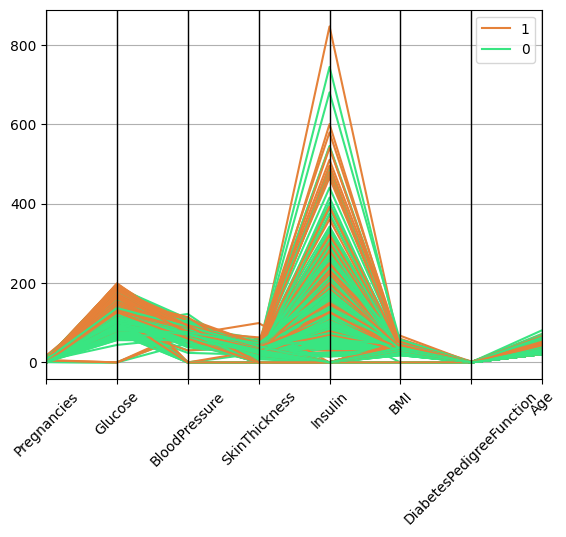

In [134]:
pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.xticks(rotation=45)

### 5.3 Feature Scaling

Normalization

In [135]:
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)
X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)
X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
618,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
346,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
294,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
231,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095


Min-Max Scaling

In [136]:
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)
X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)
X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000
618,0.529412,0.562814,0.672131,0.380952,0.000000,0.420268,0.514091,0.483333
346,0.058824,0.698492,0.377049,0.301587,0.098109,0.427720,0.245944,0.016667
294,0.000000,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333
231,0.352941,0.673367,0.655738,0.587302,0.437352,0.688525,0.068318,0.416667


### 5.4 Saving Data Frames into excel files

In [137]:
X_train_con_outliers.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/E-Pablos-Decision-Tree/data/processed/y_test.xlsx", index = False)

with open("/workspaces/E-Pablos-Decision-Tree/models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("/workspaces/E-Pablos-Decision-Tree/models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("/workspaces/E-Pablos-Decision-Tree/models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("/workspaces/E-Pablos-Decision-Tree/models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

### 5.6 Feature selection

In [138]:
from sklearn.feature_selection import f_classif, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def best_k(x_train, y_train):
    scores = []

    for k in range(1, x_train.shape[1] + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_new = selector.fit_transform(x_train, y_train)
        # Modelo simple para comparar (usa el que prefieras)
        model = LinearRegression()
        cv_score = cross_val_score(model, X_new, y_train, cv=5, scoring='r2').mean()
        scores.append(cv_score)
    # Mostrar el k con mejor score
    best_k = np.argmax(scores) + 1
    return best_k

k = best_k(X_train_sin_outliers_scal, y_train)
print (k)

selection_model = SelectKBest(f_classif, k = k)

selection_model.fit(X_train_con_outliers, y_train)
ix = selection_model.get_support()

X_train_con_outliers_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
X_test_con_outliers_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

X_train_con_outliers_sel.head()

7


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [139]:
X_train_con_outliers_sel.to_csv("/workspaces/E-Pablos-Decision-Tree/data/processed/X_train_con_outliers_sel.csv", index=False)
X_test_con_outliers_sel.to_csv("/workspaces/E-Pablos-Decision-Tree/data/processed/X_test_con_outliers_sel.csv", index=False)

#### Feature selection dataset without outliers:

In [140]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train_sin_outliers, y_train)

ix = selection_model.get_support()
X_train_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers), columns = X_train_sin_outliers.columns.values[ix])
X_test_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers), columns = X_test_sin_outliers.columns.values[ix])

X_train_sin_outliers_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.000,0.0,0.304,21.0
1,9.0,112.0,82.0,0.000,28.2,1.282,50.0
2,1.0,139.0,46.0,83.000,28.7,0.654,22.0
3,0.0,161.0,50.0,0.000,21.9,0.254,65.0
4,6.0,134.0,80.0,318.125,46.2,0.238,46.0


In [141]:
X_train_sin_outliers_sel.to_csv("/workspaces/E-Pablos-Decision-Tree/data/processed/X_train_sin_outliers_sel.csv", index=False)
X_test_sin_outliers_sel.to_csv("/workspaces/E-Pablos-Decision-Tree/data/processed/X_test_sin_outliers_sel.csv", index=False)

#### Feature selection on normalised datasets with and without outliers:

In [142]:
X_train_con_outliers_norm_sel = X_train_con_outliers_norm[X_train_con_outliers_sel.columns]
X_train_sin_outliers_norm_sel = X_train_sin_outliers_norm[X_train_sin_outliers_sel.columns]
X_test_con_outliers_norm_sel = X_test_con_outliers_norm[X_test_con_outliers_sel.columns]
X_test_sin_outliers_norm_sel = X_test_sin_outliers_norm[X_test_sin_outliers_sel.columns]

In [143]:
X_train_con_outliers_norm_sel.to_csv("/workspaces/E-Pablos-Decision-Tree/data/processed/X_train_con_outliers_norm_sel.csv", index=False)
X_train_sin_outliers_norm_sel.to_csv("/workspaces/E-Pablos-Decision-Tree/data/processed/X_train_sin_outliers_norm_sel.csv", index=False)
X_test_con_outliers_norm_sel.to_csv("/workspaces/E-Pablos-Decision-Tree/data/processed/X_test_con_outliers_norm_sel.csv", index=False)
X_test_sin_outliers_norm_sel.to_csv("/workspaces/E-Pablos-Decision-Tree/data/processed/X_test_sin_outliers_norm_sel.csv", index=False)

#### Feature selection on Min-Max scaled datasets with and without outliers:

In [144]:
X_train_con_outliers_scal_sel = X_train_con_outliers_scal[X_train_con_outliers_sel.columns]
X_train_sin_outliers_scal_sel = X_train_sin_outliers_scal[X_train_sin_outliers_sel.columns]
X_test_con_outliers_scal_sel = X_test_con_outliers_scal[X_test_con_outliers_sel.columns]
X_test_sin_outliers_scal_sel = X_test_sin_outliers_scal[X_test_sin_outliers_sel.columns]

In [145]:
X_train_con_outliers_scal_sel.to_csv("/workspaces/E-Pablos-Decision-Tree/data/processed/X_train_con_outliers_scal_sel.csv", index=False)
X_train_sin_outliers_scal_sel.to_csv("/workspaces/E-Pablos-Decision-Tree/data/processed/X_train_sin_outliers_scal_sel.csv", index=False)
X_test_con_outliers_scal_sel.to_csv("/workspaces/E-Pablos-Decision-Tree/data/processed/X_test_con_outliers_scal_sel.csv", index=False)
X_test_sin_outliers_scal_sel.to_csv("/workspaces/E-Pablos-Decision-Tree/data/processed/X_test_sin_outliers_scal_sel.csv", index=False)

## Machine Learning

### 6. Decision Tree

In [147]:
y_train.head()

60     0
618    1
346    0
294    0
231    1
Name: Outcome, dtype: int64

In [148]:
X_train_con_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracy_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
    X_train_con_outliers_norm_sel,
    X_train_sin_outliers_norm_sel,
    X_train_con_outliers_scal_sel,
    X_train_sin_outliers_scal_sel,
]:
    model = DecisionTreeClassifier(random_state=42)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    accuracy = accuracy_score(y_train, y_pred)
    accuracy_results.append(accuracy)
    
print("Accuracy:", accuracy_results)
print("Mejor Accuracy:", max(accuracy_results))

Accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mejor Accuracy: 1.0
